In [3]:
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
from simple_star.polytrope import Polytrope

0.3 M-sun, 0.33 R-sun

2.7486451899623594e-23 J m2 solMass / kg(8/3)


/opt/conda/lib/python3.10/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Text(0.5, 0, '$r\\ [R_\\odot]$')

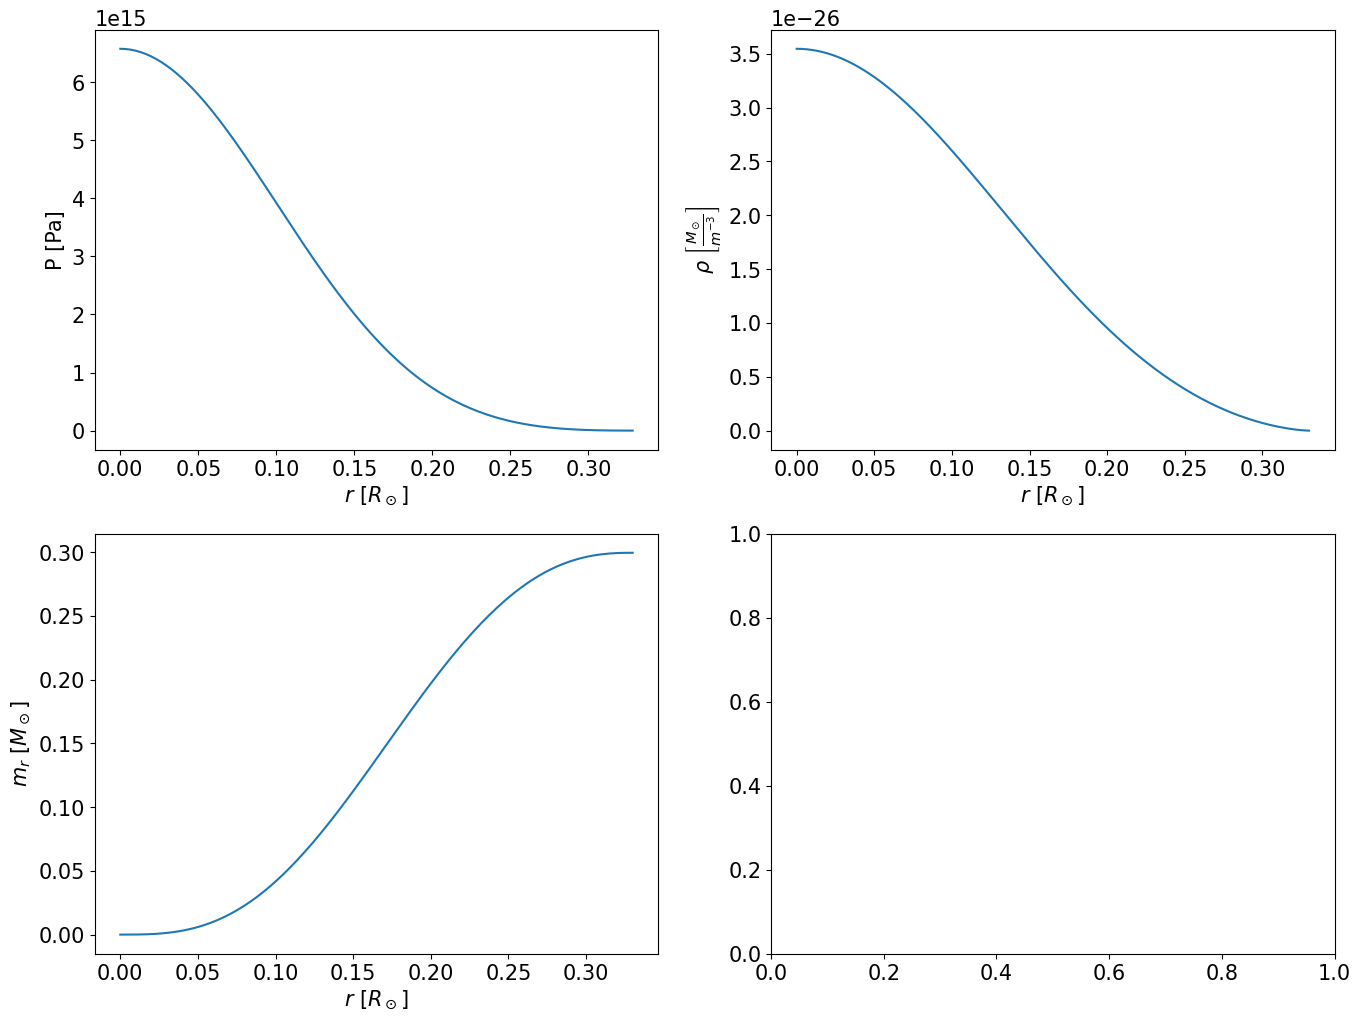

In [4]:
m = 0.3*u.M_sun
r = 0.33*u.R_sun
t = 5.65*10**6* u.K
mu = 1/2  # 70% molecular hydrogen, 30% Helium+heavier
rho_c = 5.99071*m / (4/3*np.pi*r**3).si
pc = rho_c/(mu*const.m_p) * const.k_B * t # Ideal gas law
gamma = 5/3 # Since n=1.5
k = pc / (rho_c ** gamma).si
print(k)
poly = Polytrope(k=k, gamma=gamma)
p_ism = 2.5e-12 * u.Pa


def p_gt_p_ism(r, mr, rho):
    return k*rho**gamma - p_ism

result1 = poly.integrate(rho_c, np.linspace(0, 0.33, 201)*u.R_sun,
                        condition=p_gt_p_ism)

Text(0.5, 0, '$r\\ [R_\\odot]$')

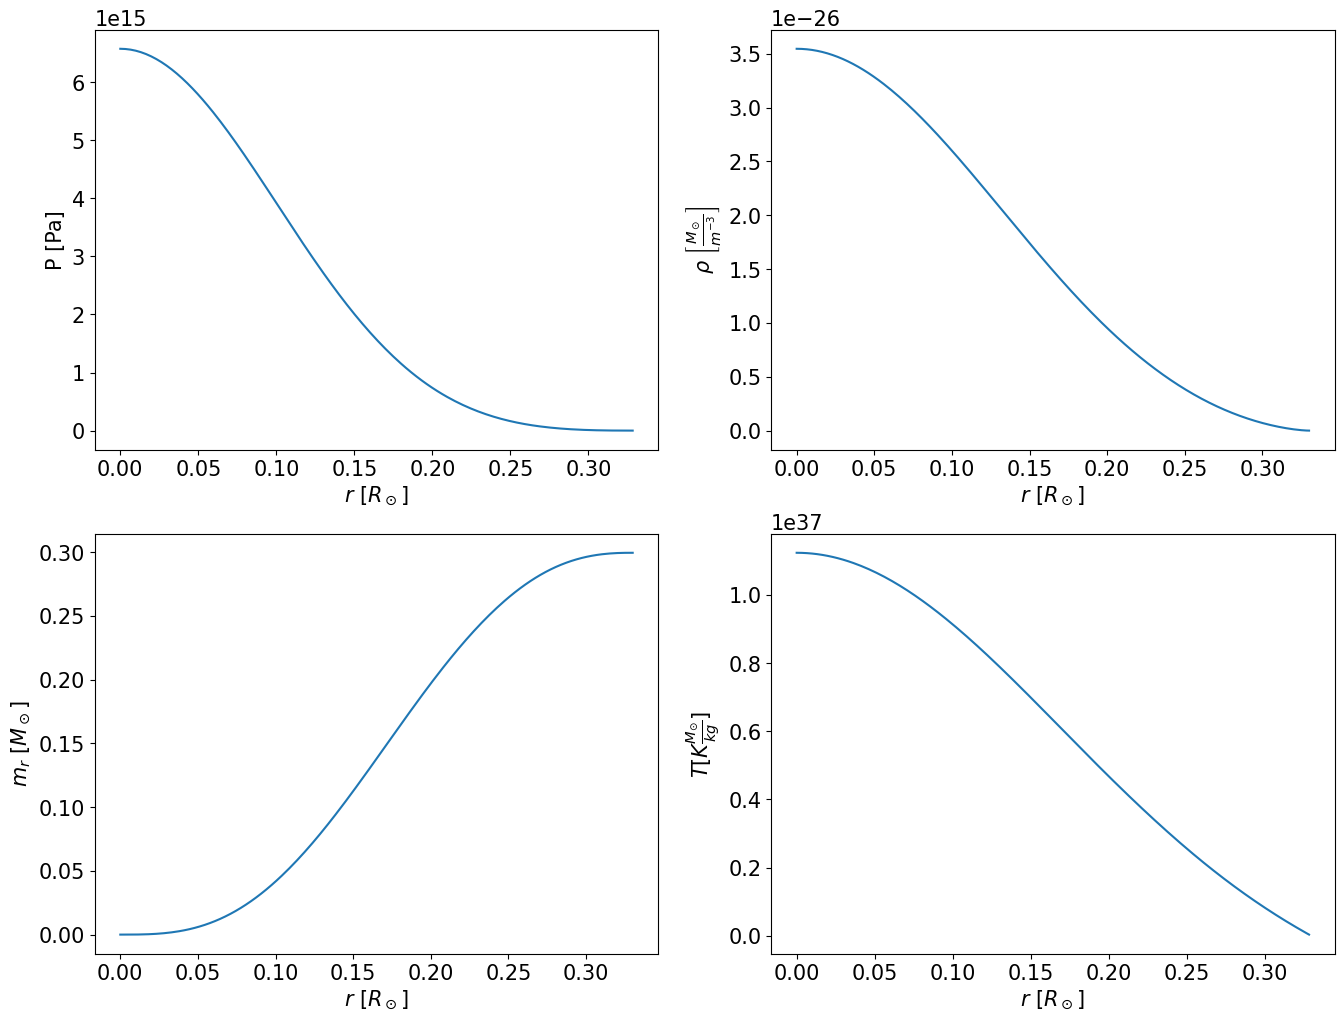

In [7]:
# x_ideal = rho/(mu m_H) * kT/P
# So T = x_ideal * mu * m_H * P / (rho * k)
# Let x_ideal = 1
T = mu * const.m_p * result1["p"] / (result1["rho"] * const.k_B)

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(2,2, figsize=(16,12))
ax[0][0].plot(result1["r"], result1["p"])
ax[0][0].set_xlabel(r'$r\ [R_\odot]$')
ax[0][0].set_ylabel('P [Pa]')
ax[0][1].plot(result1["r"], result1["rho"])
ax[0][1].set_ylabel(r'$\rho\ \left[\frac{M_\odot}{m^{-3}}\right]$')
ax[0][1].set_xlabel(r'$r\ [R_\odot]$')
ax[1][0].plot(result1["r"], result1["mr"])
ax[1][0].set_ylabel(r'$m_r\ [M_\odot]$')
ax[1][0].set_xlabel(r'$r\ [R_\odot]$')
ax[1][1].plot(result1["r"], T)
ax[1][1].set_ylabel(r'$T [K\frac{M_{\odot}}{kg}]$')
ax[1][1].set_xlabel(r'$r\ [R_\odot]$')

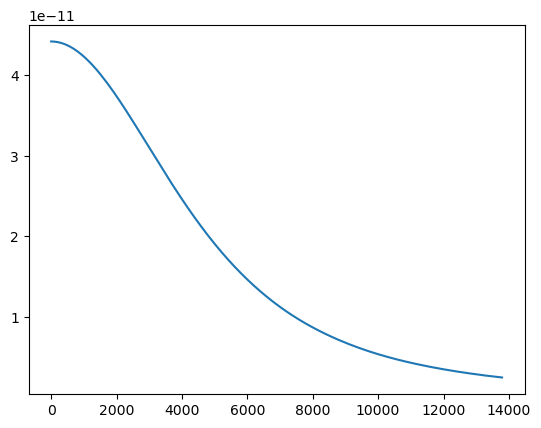

In [3]:
t = 16 * u.K
mu = 1/(0.7 / 2 + 0.3 / 4)  # 70% molecular hydrogen, 30% Helium+heavier
rho_c = (2e5/u.cm**3 * mu * const.m_p).si
pc = rho_c/(mu*const.m_p) * const.k_B * t
gamma = 1
k = pc / rho_c ** gamma
poly = Polytrope(k=k, gamma=gamma)
# p_ism = 2.5e-12 * u.Pa
def p_gt_p_ism(r, mr, rho):
    return k*rho**gamma - p_ism

result = poly.integrate(rho_c, np.linspace(0, 20000, 201) << u.AU, condition = p_gt_p_ism)
plt.plot(result["r"], result["p"])